<a href="https://colab.research.google.com/github/walmir-marques/DNC_MODULE5_PROJECT/blob/main/Modulo_5_Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando as bibliotecas necessárias

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importando a base de dados

df = pd.read_csv('/content/Data.csv')

In [ ]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,12/1/2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,12/1/2010 08:34,1.69,13047.0,United Kingdom


In [ ]:
# Verificando a distribuição dos dados

df.describe()

,Quantity,UnitPrice,CustomerID
count,339430.000000,339430.000000,247136.000000
mean,9.693840,4.830646,15277.633056
std,189.075278,110.272664,1726.063734
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13862.000000
50%,3.000000,2.100000,15150.000000
75%,10.000000,4.130000,16809.000000
max,74215.000000,38970.000000,18287.000000


In [ ]:
# VErificando os tipos dos dados

df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,float64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


In [ ]:
# Verificando se existem valores nulos

df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1185
Quantity,1
InvoiceDate,1
UnitPrice,1
CustomerID,92295
Country,1


In [ ]:
# Removendo os valores nulos

whitout_null = df.dropna()

In [ ]:
whitout_null.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
# Verificando se há valores zero ou menor que zero na coluna de preços

df_price_minus_zero = whitout_null[whitout_null['UnitPrice'] <= 0]
df_price_minus_zero.shape

(21, 8)

In [ ]:
# Verificando se há valores zero ou menor que zero na coluna de Quantidade

df_quantity_minus_zero = whitout_null[whitout_null['Quantity'] <= 0]
df_quantity_minus_zero.shape

(5819, 8)

In [ ]:
# Filtrando os dados para valores de Preços e quantidade acima de 0

filter_df = whitout_null[(whitout_null['UnitPrice'] > 0) & (whitout_null['Quantity'] > 0)]

In [ ]:
# Verificando se existem linhas duplicadas

filter_df.duplicated().sum()

2598

In [ ]:
# Removendo as linhas duplicadas

filter_df = filter_df.drop_duplicates()

In [ ]:
filter_df.duplicated().sum()

0

In [ ]:
# Corrigindo o tipo de dados de algumas colunas

filter_df['InvoiceDate'] = pd.to_datetime(filter_df['InvoiceDate'])
filter_df['CustomerID'] = filter_df['CustomerID'].astype(int)

In [ ]:
filter_df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,float64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,int64
Country,object


### OUTLIERS

In [ ]:
# Filtrando outliers
outliers = filter_df[(filter_df['Quantity'] > 10000) & (filter_df['UnitPrice'] > 5000)]

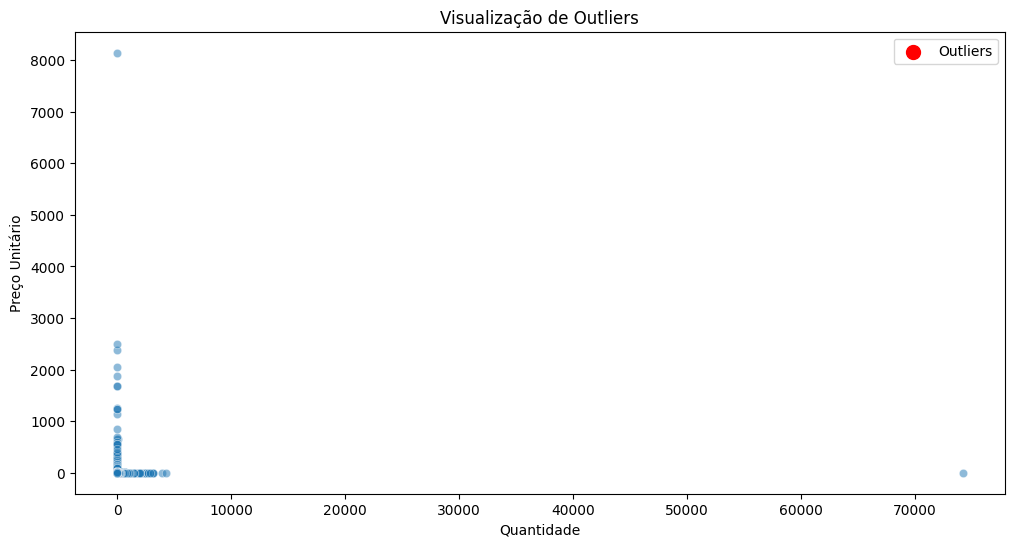

In [ ]:
#Visualizando os Outliers


plt.figure(figsize=(12, 6))
sns.scatterplot(data=filter_df, x='Quantity', y='UnitPrice', alpha=0.5)
plt.scatter(outliers['Quantity'], outliers['UnitPrice'], color='red', label='Outliers', s=100)
plt.title('Visualização de Outliers')
plt.xlabel('Quantidade')
plt.ylabel('Preço Unitário')
plt.legend()
plt.show()

In [ ]:
# Removendo os Outliers

filter_df_cleaned = filter_df[~((filter_df['Quantity'] > 10000) & (filter_df['UnitPrice'] > 5000))]

### Criando uma coluna de preço total

In [ ]:
filter_df['TotalPrice'] = filter_df['Quantity'] * filter_df['UnitPrice']

In [ ]:
filter_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [ ]:
# Calculando a data da última compra
last_sell = filter_df['InvoiceDate'].max()

In [ ]:
print(last_sell)

2011-09-13 14:53:00


### Plotando alguns Gráficos

<ipython-input-95-8a51b3e045aa>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_paises, x='TotalPrice', y='Country', palette='viridis')


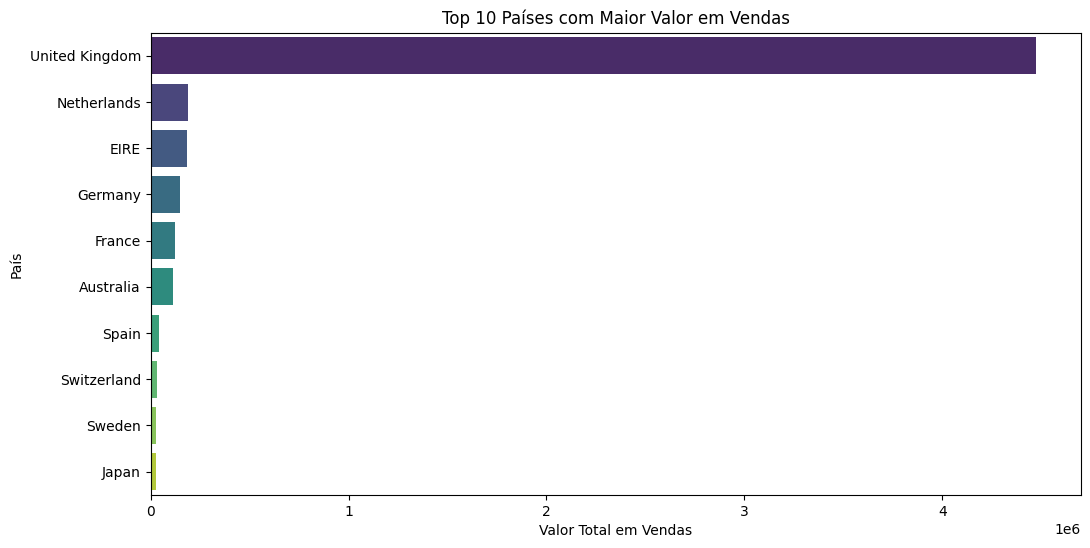

In [ ]:
### TOP 10 PAISES COM MAIOR VALOR DE VENDAS


# Calculando o valor total de vendas por país
vendas_por_pais = filter_df.groupby('Country')['TotalPrice'].sum().reset_index()

# Obtendo os top 10 países com maior valor em vendas
top_10_paises = vendas_por_pais.nlargest(10, 'TotalPrice')

# Plotando
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_paises, x='TotalPrice', y='Country', palette='viridis')
plt.title('Top 10 Países com Maior Valor em Vendas')
plt.xlabel('Valor Total em Vendas')
plt.ylabel('País')
plt.show()

<ipython-input-96-99bea1de0d2f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_produtos, x='Quantity', y='Description', palette='magma')


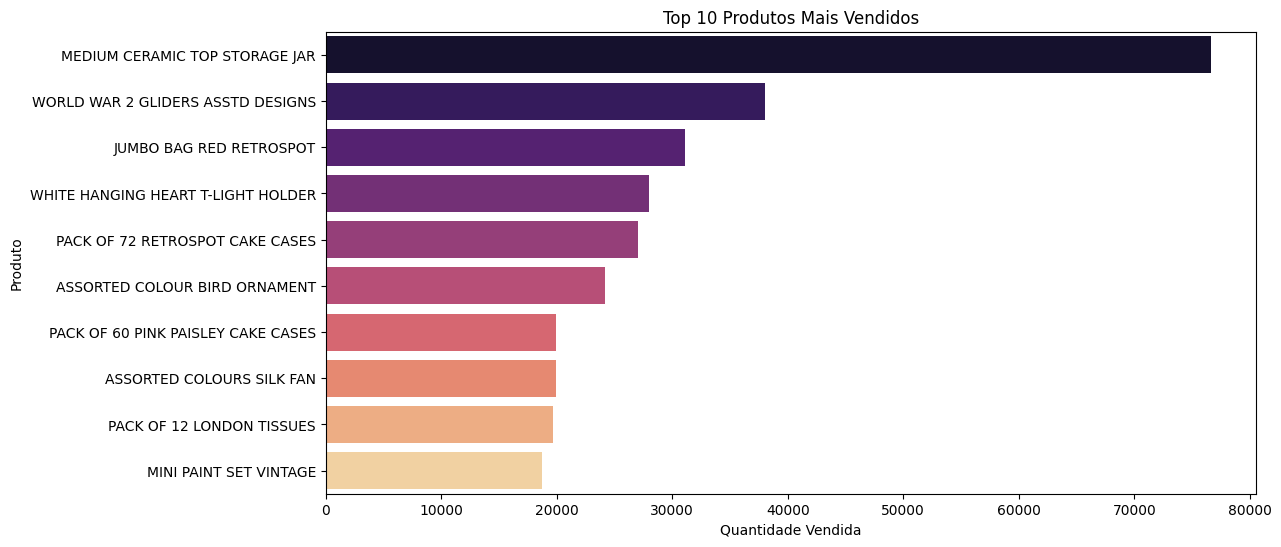

In [ ]:
# TOP 10 PRODUTOS MAIS VENDIDOS

# Calculando o total vendido por produto
produtos_vendidos = filter_df.groupby('Description')['Quantity'].sum().reset_index()

# Obtendo os top 10 produtos mais vendidos
top_10_produtos = produtos_vendidos.nlargest(10, 'Quantity')

# Plotando
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_produtos, x='Quantity', y='Description', palette='magma')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.show()

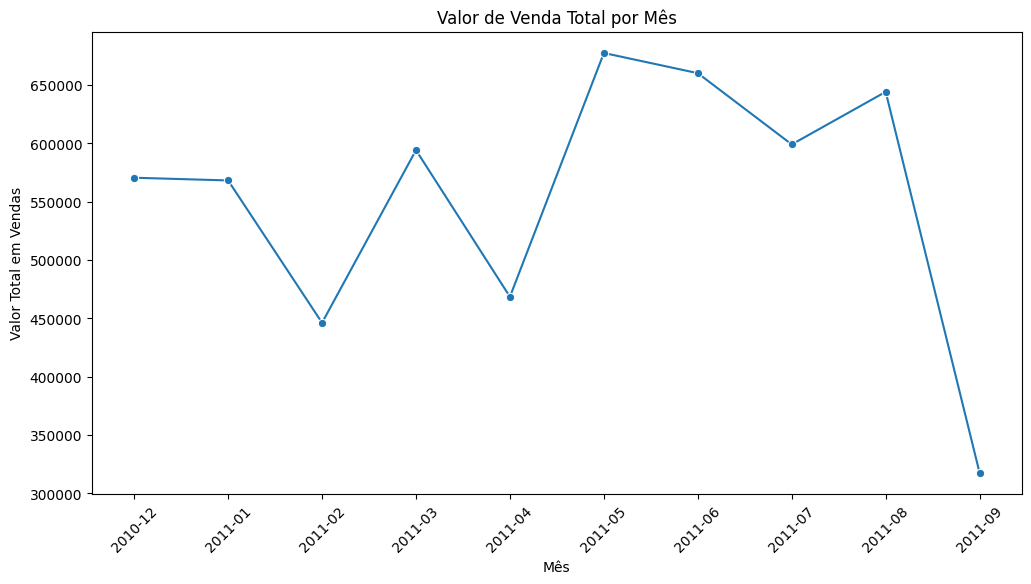

In [ ]:
# VALOR TOTAL DE VENDA POR MES

# Extraindo o mês e o ano
filter_df['YearMonth'] = filter_df['InvoiceDate'].dt.to_period('M')

# Calculando o valor total de vendas por mês
sales_per_month = filter_df.groupby('YearMonth')['TotalPrice'].sum().reset_index()

# Garantindo que YearMonth seja uma string
sales_per_month['YearMonth'] = sales_per_month['YearMonth'].astype(str)

# Removendo qualquer linha com valores NaN após a conversão
sales_per_month = sales_per_month.dropna()

# Plotando
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_per_month, x='YearMonth', y='TotalPrice', marker='o')
plt.title('Valor de Venda Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total em Vendas')
plt.xticks(rotation=45)
plt.show()

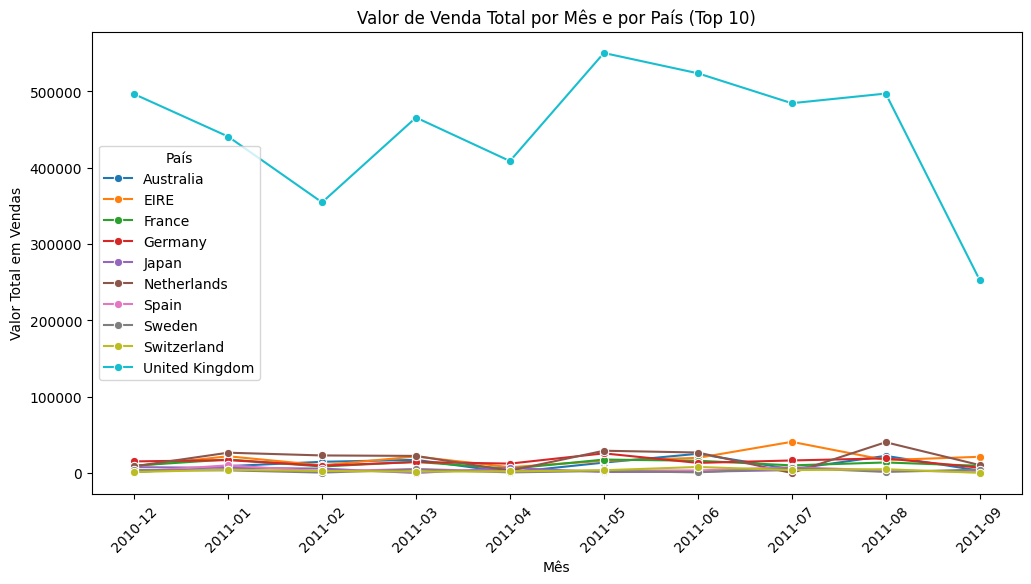

In [ ]:
# VALOR TOTAL DE VENDA POR MES E POR PAIS

# Calculando o valor total de vendas por país
sales_per_country = filter_df.groupby('Country')['TotalPrice'].sum().reset_index()

# Obtendo os top 10 países
top_10_paises = sales_per_country.nlargest(10, 'TotalPrice')['Country'].tolist()

# Calculando o valor de venda total por mês e por país (apenas os top 10)
month_sales_per_country = filter_df[filter_df['Country'].isin(top_10_paises)].groupby(['YearMonth', 'Country'])['TotalPrice'].sum().reset_index()

# Garantindo que YearMonth seja uma string para plotagem
month_sales_per_country['YearMonth'] = month_sales_per_country['YearMonth'].astype(str)

# Plotando
plt.figure(figsize=(12, 6))
sns.lineplot(data=month_sales_per_country, x='YearMonth', y='TotalPrice', hue='Country', marker='o')
plt.title('Valor de Venda Total por Mês e por País (Top 10)')
plt.xlabel('Mês')
plt.ylabel('Valor Total em Vendas')
plt.xticks(rotation=45)
plt.legend(title='País')
plt.show()

### Cálculo do RFM

In [ ]:
# Agrupando por cliente e pedido (InvoiceNo) para obter data e preço total
client_orders = filter_df.groupby(['CustomerID', 'InvoiceNo']).agg(
    LastPurchaseDate=('InvoiceDate', 'max'),
    TotalPrice=('TotalPrice', 'sum')
).reset_index()

# Calculando a data da última compra
last_sale_date = client_orders['LastPurchaseDate'].max()

# Calculando Recência (R), Frequência (F) e Ticket Médio (M)
rfm = client_orders.groupby('CustomerID').agg(
    R=('LastPurchaseDate', lambda x: (last_sale_date - x.max()).days),
    F=('InvoiceNo', 'count'),
    M=('TotalPrice', 'mean')
).reset_index()

# Exibindo o DataFrame RFM
print(rfm.head())

   CustomerID    R  F             M
0       12346  238  1  77183.600000
1       12347   42  5    558.172000
2       12348  161  3    495.746667
3       12350  222  1    334.400000
4       12352  174  5    312.362000
